In [25]:
from scipy.spatial.distance import squareform, cdist
from scipy.spatial.distance import pdist
from scipy.integrate import quad
from itertools import combinations, product, combinations_with_replacement
from functools import partial
from goatools import obo_parser

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import random
import scipy
import graco
import os

In [26]:
DATA_DIRECTORY = "/media/clusterduck123/joe/data"
YEAST_DIRECTORY = f"{DATA_DIRECTORY}/processed-data/yeast"
MATRIX_DIRECTORY  = f"{YEAST_DIRECTORY}/distance-matrices"
RAW_DATA_DIRECTORY = f"{DATA_DIRECTORY}/raw-data"
NETWORK_DIRECTORY = f"{YEAST_DIRECTORY}/networks"

In [27]:
go_dag = obo_parser.GODag(f"{RAW_DATA_DIRECTORY}/go-basic.obo")

/media/clusterduck123/joe/data/raw-data/go-basic.obo: fmt(1.2) rel(2019-10-07) 47,285 GO Terms


In [39]:
pts1 = np.random.uniform(size = [2,10])
pts2 = np.random.uniform(size = [2,10])
pts3 = np.random.uniform(size = [2,10])

In [41]:
pts1[0]

array([0.81580855, 0.83707369, 0.20021947, 0.90183518, 0.47729091,
       0.04532357, 0.83647247, 0.88369546, 0.45485512, 0.72216514])

In [51]:
GCV['O'].T

A         B    C         D    E    F
Equation Orbit                                             
G1-a     11          NaN  0.400000  NaN       NaN  1.0  NaN
         7           NaN  0.600000  NaN       NaN  0.0  NaN
G1-b     5      0.500000  0.600000  NaN  0.333333  0.6  1.0
         8      0.500000  0.400000  NaN  0.666667  0.4  0.0
G1-c     6      0.333333       NaN  1.0  0.000000  1.0  NaN
         9      0.666667       NaN  0.0  1.000000  0.0  NaN
G1-d     12     0.000000       NaN  1.0  0.000000  1.0  NaN
         9      1.000000       NaN  0.0  1.000000  0.0  NaN
G1-e     4      0.333333  0.000000  1.0  0.666667  0.0  1.0
         8      0.666667  1.000000  0.0  0.333333  1.0  0.0
G1-f     12     0.000000  0.000000  1.0  0.000000  0.5  NaN
         8      1.000000  1.000000  0.0  1.000000  0.5  NaN
G2-a     12          NaN       NaN  1.0       NaN  1.0  NaN
         14          NaN       NaN  0.0       NaN  0.0  NaN
G2-b     13          NaN  1.000000  NaN       NaN  NaN  1.0
         14          NaN  0.000000  NaN       NaN  NaN  0.0
G2-c     10          NaN  0.333333  1.0       NaN  1.0  0.6
         13          NaN  0.666667  0.0       NaN  0.0  0.4
G2-d     11          NaN  0.666667  NaN       NaN  1.0  0.0
         13          NaN  0.333333  NaN       NaN  0.0  1.0

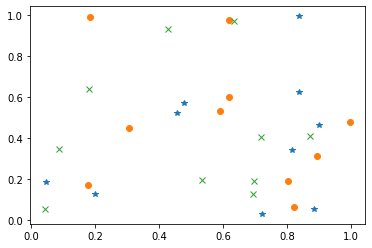

In [48]:
plt.plot(pts1[0], pts1[1], '*')
plt.plot(pts2[0], pts2[1], 'o')
plt.plot(pts3[0], pts3[1], 'x')

In [28]:
G = nx.Graph()

G.add_edges_from([('A','B'), ('B','C'), 
                  ('D','E'), ('E','F'),
                  ('A','D'), ('C','F'),
                  ('B','E'), ('B','F')])

GDV = graco.orbits(G)
GCV = graco.coefficients(G)

In [36]:
GDV[['0','1','2','3']]

Orbit  0  1  2  3
A      2  4  1  0
B      4  2  4  2
C      2  3  0  1
D      2  3  1  0
E      3  4  2  1
F      3  2  1  2

In [38]:
pd.DataFrame(graco.distance_matrix(GDV[['0','1','2','3']], 'GDV_similarity'))

0         1         2         3         4         5
0  0.000000  0.268114  0.569367  0.533545  0.675803  0.629478
1  0.268114  0.000000  0.594447  0.586704  0.615602  0.640689
2  0.569367  0.594447  0.000000  0.605022  0.574584  0.499288
3  0.533545  0.586704  0.605022  0.000000  0.424585  0.437259
4  0.675803  0.615602  0.574584  0.424585  0.000000  0.399970
5  0.629478  0.640689  0.499288  0.437259  0.399970  0.000000

In [33]:
pd.DataFrame(graco.GCV_distance(GCV['D']['0'], 'canberra'))

A         B     C     D         E         F
A  0.00  0.600000  1.00  0.00  0.600000  0.750000
B  0.60  0.000000  0.75  0.60  0.000000  0.333333
C  1.00  0.750000  0.00  1.00  0.750000  0.600000
D  0.00  0.600000  1.00  0.00  0.600000  0.750000
E  0.60  0.000000  0.75  0.60  0.000000  0.333333
F  0.75  0.333333  0.60  0.75  0.333333  0.000000

In [36]:
GCV['D']

Equation         0                   1                                  2  \
Orbit            2         3        10        12         5         8   11   
A         1.000000  0.000000  0.000000  0.000000  0.500000  0.500000  NaN   
B         0.666667  0.333333  0.166667  0.000000  0.500000  0.333333  0.5   
C         0.000000  1.000000  0.333333  0.666667  0.000000  0.000000  NaN   
D         1.000000  0.000000  0.000000  0.000000  0.333333  0.666667  NaN   
E         0.666667  0.333333  0.125000  0.250000  0.375000  0.250000  1.0   
F         0.333333  0.666667  0.750000  0.000000  0.250000  0.000000  0.0   

Equation                  3            
Orbit        13      7   11   13   14  
A           NaN    NaN  NaN  NaN  NaN  
B         0.125  0.375  0.5  0.5  0.0  
C           NaN    NaN  NaN  NaN  NaN  
D           NaN    NaN  NaN  NaN  NaN  
E         0.000  0.000  1.0  0.0  0.0  
F         1.000  0.000  0.0  1.0  0.0

In [73]:
{go_term.name for go_term in go_dag.values() if go_term.namespace == 'biological_process' and go_term.depth == 3 and go_term.level == 2}

{'Sertoli cell proliferation',
 'bud dormancy process',
 'cell adhesion involved in prostatic bud elongation',
 'cell motility',
 'cell-cell signaling',
 'detection of stimulus involved in meiotic spindle checkpoint',
 'egg activation',
 'epithelial cell proliferation involved in prostate gland development',
 'extracellular matrix-cell signaling',
 'growth involved in symbiotic interaction',
 'leukocyte activation',
 'maintenance of location',
 'meiotic cell cycle',
 'meiotic cell cycle process',
 'mesenchymal cell proliferation involved in prostate gland development',
 'morphogenesis of a branching structure',
 'motogenic signaling initiating cell movement in cerebral cortex',
 'motogenic signaling involved in interneuron migration from the subpallium to the cortex',
 'motogenic signaling involved in postnatal olfactory bulb interneuron migration',
 'movement in environment of other organism involved in symbiotic interaction',
 'multi organism cell adhesion',
 'multicellular organism 

In [23]:
[go_term.id for go_term in go_dag.values() if go_term.name == 'cell cycle']

['GO:0007049']

In [18]:
[go_term.name for go_term in go_dag['GO:0009566'].children if go_term.depth==2]

[]

In [24]:
go_dag['GO:0007049']

GOTerm('GO:0007049'):
  id:GO:0007049
  item_id:GO:0007049
  name:cell cycle
  namespace:biological_process
  _parents: 1 items
    GO:0009987
  parents: 1 items
    GO:0009987	level-01	depth-01	cellular process [biological_process]
  children: 2 items
    GO:0051321	level-02	depth-03	meiotic cell cycle [biological_process]
    GO:0000278	level-03	depth-03	mitotic cell cycle [biological_process]
  level:2
  depth:2
  is_obsolete:False
  alt_ids: 0 items

In [103]:
[[go_term.name for go_term in path] for path in go_dag.paths_to_top('GO:0051321')]

[['biological_process', 'reproductive process', 'meiotic cell cycle'],
 ['biological_process',
  'cellular process',
  'cell cycle',
  'meiotic cell cycle']]

In [72]:
go_id, = random.sample(go_dag.keys(),1)

level = go_dag[go_id].level
depth = go_dag[go_id].depth

In [73]:
level, depth

(4, 9)

In [74]:
sorted(len(path)-1 for path in go_dag.paths_to_top(go_id))

[4, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9]

In [39]:
G = nx.DiGraph()
G.add_edges_from(term.get_all_parent_edges())

In [40]:
go_dag['GO:0008150']

GOTerm('GO:0008150'):
  id:GO:0008150
  item_id:GO:0008150
  name:biological_process
  namespace:biological_process
  _parents: 0 items
  parents: 0 items
  children: 30 items
  level:0
  depth:0
  is_obsolete:False
  alt_ids: 3 items
    GO:0044699
    GO:0007582
    GO:0000004

In [41]:
nx.path_graph

<function networkx.generators.classic.path_graph(n, create_using=None)>

In [43]:
nx.shortest_path_length(G,'GO:0000001', 'GO:0008150')

5

In [36]:
G['GO:0000001']

AtlasView({'GO:0071840': {}, 'GO:0009987': {}, 'GO:0051179': {}})

# Network models

In [267]:
PPI_nx = nx.read_edgelist(f"{NETWORK_DIRECTORY}/PPI_BioGRID.txt")
PPI_GDV = graco.orbits(PPI_nx)
PPI_GCV = graco.coefficients(PPI_nx)

In [275]:
nx.density(PPI_nx)

0.005670724360040084

In [351]:
N = 2**12
p = 0.01

#G = nx.erdos_renyi_graph(N, p)
#G = nx.barabasi_albert_graph(N, 2)
#G = nx.random_geometric_graph(N, radius=0.64, dim=10)
G = nx.random_internet_as_graph(N)
print(nx.density(G))

GDV = graco.orbits(G)
GCV = graco.coefficients(G)

0.0009219513125763126


In [352]:
feature = pd.DataFrame({'x':GCV['D']['0']['3'],
                        'y':GCV['A']['0']['3']})

PPI_feature = pd.DataFrame({'x':PPI_GCV['D']['0']['3'],
                           'y':PPI_GCV['A']['0']['3']})

(0, 1)

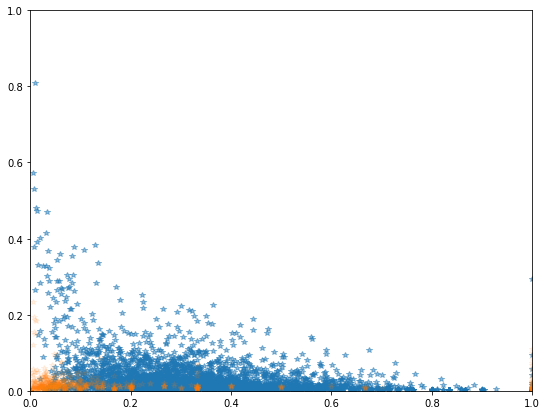

In [353]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(PPI_feature['x'], PPI_feature['y'], '*', alpha=0.5);
ax.plot(    feature['x'],     feature['y'], '*', alpha=0.1);
ax.set_xlim(0,1)
ax.set_ylim(0,1)

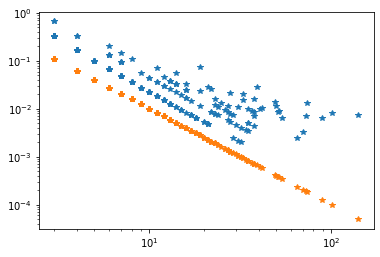

In [21]:
x = GDV['0']
y = GCV['D']['0']['3']

plt.loglog(x,y, '*');
plt.loglog(x,x.astype(float)**(-2), '*');

# Density calculation

In [57]:
@np.vectorize
def f_Z(t):
    return np.where(0<t<1, 1/np.sqrt(t)-1, 0)

@np.vectorize
def f_Z2(t):
    return quad(lambda tau:f_Z(t-tau)*f_Z(tau),0,2)[0]

def kernel(t, tau):
    return (1/np.sqrt(t-tau)-1)*(1/np.sqrt(tau)-1)

@np.vectorize
def f_ZZ2(t):
    return quad(lambda tau : kernel(t,tau), max(0,t-1), min(1,t))[0]

@np.vectorize
def f_Z3(t):
    return quad(lambda tau:f_ZZ2(t-tau)*f_Z(tau),0,3)[0]

In [58]:
X1 = np.random.uniform(size = 5000)
Y1 = np.random.uniform(size = 5000)

X2 = np.random.uniform(size = 5000)
Y2 = np.random.uniform(size = 5000)

X3 = np.random.uniform(size = 5000)
Y3 = np.random.uniform(size = 5000)

Z1 = np.abs(X1-Y1)**2
Z2 = np.abs(X2-Y2)**2
Z3 = np.abs(X2-Y2)**2

Z = Z1+Z2+Z3

/home/clusterduck123/Desktop/git/supplements/venv/graco/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/home/clusterduck123/Desktop/git/supplements/venv/graco/lib/python3.6/site-packages/ipykernel_launcher.py:14: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  
/home/clusterduck123/Desktop/git/supplements/venv/graco/lib/python3.6/site-packages/ipykernel_launcher.py:18: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
/home/clusterduck123/Desktop/git/supplements/venv/graco/lib/python3.6/site-packages/ipykernel_launcher.py:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improv

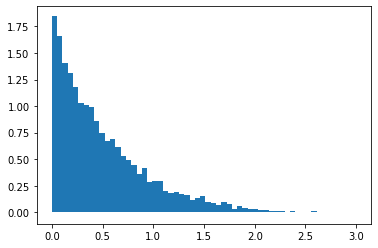

In [59]:
x = np.linspace(0,3,200)
y = f_Z3(x)

plt.hist(Z, bins=50, density=True);
plt.plot(x,y)

# Nan-control

In [4]:
feature = 'GDV'

MIN_CLUSTERS = 2
MAX_CLUSTERS = 100

all_distances = sorted('_'.join(filename.split('_')[:-1]) 
                           for filename in os.listdir(f"{MATRIX_DIRECTORY}/{feature}"))

In [5]:
for distance in all_distances:
    df = pd.read_csv(f"{MATRIX_DIRECTORY}/{feature}/{distance}_BioGRID.txt", delimiter=' ')
    print(distance, df.isna().any().any())

GDV_similarity False
braycurtis False
canberra False
chebyshev False
cityblock False
correlation False
cosine False
euclidean False
mahalanobis False
normalized1_l1 False
normalized1_l2 False
normalized1_linf False
normalized2_l1 False
normalized2_l2 False
normalized2_linf False
seuclidean False
sqeuclidean False


# Matrix preparation

In [228]:
G = nx.erdos_renyi_graph(100,0.1)
GDV = graco.orbits(G)
deg = GDV['0'].values

A = nx.to_numpy_array(G)
Asq = A@A
T = Asq*A

E = Asq-T
np.fill_diagonal(E,0)


B1 = A*(deg-1)-T
B2 = B1.T

In [229]:
(1*GDV['1']  + 2*GDV['3']                              == A@(GDV['0']-1)).all(), \
(1*GDV['4']  + 2*GDV['8']  + 2*GDV['9']  + 2*GDV['12'] == E@(GDV['0']-1)).all(), \
(1*GDV['10'] + 2*GDV['12'] + 6*GDV['14'] + 2*GDV['13'] == T@(GDV['0']-2)).all(), \
(2*GDV['6']  + 1*GDV['10'] + 2*GDV['9']  + 2*GDV['12'] == B1@(GDV['0']-2)).all(), \
(1*GDV['5']  + 2*GDV['11'] + 2*GDV['8']  + 2*GDV['13'] == B2@(GDV['0']-1)).all()

(True, True, True, True, True)

In [234]:
matrices = [A, Asq, T, E, B1, B2]

for i in range(4):
    D1 = np.diag(GDV[str(i)])
    D2 = D1*D1
    matrices.append(D1.copy())
    matrices.append(D2.copy())

# One matrix

In [235]:
for nr,M in enumerate(matrices):
    for tmp1 in range(4):
        GDV['tmp1'] = M @ GDV[str(tmp1)]
        for i in range(4):
            for comb in combinations(range(4),i):
                orbits = sorted(map(str,set(range(4)) - set(comb))) + ['tmp1']
                test = GDV[orbits]
                rank = np.linalg.matrix_rank(test)

                if rank == len(orbits)-1:
                    k = scipy.linalg.null_space(test)
                    assert k.shape == (len(orbits),1)
                    if (np.abs(k) < 1e-10).any():
                        continue
                    else:
                        print("YASS!!")
                        print(orbits, nr)

YASS!!
['0', '1', '3', 'tmp1'] 0
YASS!!
['0', '2', '3', 'tmp1'] 6


# Two matrices

In [240]:
name2matrix = {
    'A':A,
    'Asq':Asq,
    'T':T,
    'E':E,
    'B1':B1,
    'B2':B2,
    
    'D01': np.diag(GDV['0']),
    'D02': np.diag(GDV['0'])*np.diag(GDV['0']),
    
    'D11': np.diag(GDV['1']),
    'D12': np.diag(GDV['1'])*np.diag(GDV['1']),
    
    'D21': np.diag(GDV['2']),
    'D22': np.diag(GDV['2'])*np.diag(GDV['2']),
    
    'D31': np.diag(GDV['3']),
    'D32': np.diag(GDV['3'])*np.diag(GDV['3'])
}

In [244]:
for M_name, N_name in combinations_with_replacement(name2matrix, 2):
    M = name2matrix[M_name]
    N = name2matrix[N_name]
    for tmp1,tmp2 in product(range(4), repeat=2):
        GDV['tmp1'] = M @ GDV[str(tmp1)]
        GDV['tmp2'] = N @ GDV[str(tmp2)]
        for i in range(4):
            for comb in combinations(range(4),i):
                num_orbits = set(range(4)) - set(comb)
                orbits = sorted(map(str,num_orbits)) + ['tmp1', 'tmp2']
                test = GDV[orbits]
                rank = np.linalg.matrix_rank(test)

                if rank == len(orbits)-1:
                    k = scipy.linalg.null_space(test)
                    assert k.shape == (len(orbits),1)
                    if (np.abs(k) < 1e-10).any():
                        continue
                    else:
                        print(orbits, M_name, N_name)

YASS!!
['1', '2', 'tmp1', 'tmp2'] A D01


# Three matrices

In [245]:
for M_name, N_name, O_name in combinations_with_replacement(name2matrix, 3):
    M = name2matrix[M_name]
    N = name2matrix[N_name]
    O = name2matrix[O_name]
    for tmp1,tmp2,tmp3 in product(range(4), repeat=3):
        GDV['tmp1'] = M @ GDV[str(tmp1)]
        GDV['tmp2'] = N @ GDV[str(tmp2)]
        GDV['tmp3'] = O @ GDV[str(tmp3)]
        for i in range(4):
            for comb in combinations(range(4),i):
                num_orbits = set(range(4)) - set(comb)
                orbits = sorted(map(str,num_orbits)) + ['tmp1', 'tmp2']
                test = GDV[orbits]
                rank = np.linalg.matrix_rank(test)

                if rank == len(orbits)-1:
                    k = scipy.linalg.null_space(test)
                    assert k.shape == (len(orbits),1)
                    if (np.abs(k) < 1e-10).any():
                        continue
                    else:
                        print(orbits, M_name, N_name, O_name)

['1', '2', 'tmp1', 'tmp2'] A D01 D01
['1', '2', 'tmp1', 'tmp2'] A D01 D01
['1', '2', 'tmp1', 'tmp2'] A D01 D01
['1', '2', 'tmp1', 'tmp2'] A D01 D01
['1', '2', 'tmp1', 'tmp2'] A D01 D02
['1', '2', 'tmp1', 'tmp2'] A D01 D02
['1', '2', 'tmp1', 'tmp2'] A D01 D02
['1', '2', 'tmp1', 'tmp2'] A D01 D02
['1', '2', 'tmp1', 'tmp2'] A D01 D11
['1', '2', 'tmp1', 'tmp2'] A D01 D11
['1', '2', 'tmp1', 'tmp2'] A D01 D11
['1', '2', 'tmp1', 'tmp2'] A D01 D11
['1', '2', 'tmp1', 'tmp2'] A D01 D12
['1', '2', 'tmp1', 'tmp2'] A D01 D12
['1', '2', 'tmp1', 'tmp2'] A D01 D12
['1', '2', 'tmp1', 'tmp2'] A D01 D12
['1', '2', 'tmp1', 'tmp2'] A D01 D21
['1', '2', 'tmp1', 'tmp2'] A D01 D21
['1', '2', 'tmp1', 'tmp2'] A D01 D21
['1', '2', 'tmp1', 'tmp2'] A D01 D21
['1', '2', 'tmp1', 'tmp2'] A D01 D22
['1', '2', 'tmp1', 'tmp2'] A D01 D22
['1', '2', 'tmp1', 'tmp2'] A D01 D22
['1', '2', 'tmp1', 'tmp2'] A D01 D22
['1', '2', 'tmp1', 'tmp2'] A D01 D31
['1', '2', 'tmp1', 'tmp2'] A D01 D31
['1', '2', 'tmp1', 'tmp2'] A D01 D31
[

# Here we GO

In [210]:
G = nx.erdos_renyi_graph(100,0.1)
A = nx.to_numpy_array(G)
Asq = A@A
T = Asq*A
GDV = graco.orbits(G)
GCV = graco.coefficients(GDV).sort_index(axis=1)

In [214]:
for tmp1,tmp2 in product(range(4), repeat=2):
    print(tmp1,tmp2)
    GDV['tmp1'] = GDV['0'] * GDV[str(tmp1)]
    GDV['tmp2'] =     A    @ GDV[str(tmp2)]
    for i in range(15):
        for comb in combinations(range(15),i):
            orbits = sorted(map(str,set(range(15)) - set(comb))) + ['tmp1', 'tmp2']
            test = GDV[orbits]
            rank = np.linalg.matrix_rank(test)

            if rank == len(orbits)-1:
                k = scipy.linalg.null_space(test)
                assert k.shape == (len(orbits),1)
                if (np.abs(k) < 1e-10).any():
                    continue
                else:
                    print("YASS!!")
                    print(orbits)
        print(orbits)

0 0
['0', '1', '10', '11', '12', '13', '14', '2', '3', '4', '5', '6', '7', '8', '9', 'tmp1', 'tmp2']
['0', '1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9', 'tmp1', 'tmp2']
['0', '1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9', 'tmp1', 'tmp2']
['0', '1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9', 'tmp1', 'tmp2']
['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'tmp1', 'tmp2']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'tmp1', 'tmp2']
['0', '1', '2', '3', '4', '5', '6', '7', '8', 'tmp1', 'tmp2']
['0', '1', '2', '3', '4', '5', '6', '7', 'tmp1', 'tmp2']
['0', '1', '2', '3', '4', '5', '6', 'tmp1', 'tmp2']
['0', '1', '2', '3', '4', '5', 'tmp1', 'tmp2']
['0', '1', '2', '3', '4', 'tmp1', 'tmp2']
['0', '1', '2', '3', 'tmp1', 'tmp2']
['0', '1', '2', 'tmp1', 'tmp2']
YASS!!
['1', '2', 'tmp1', 'tmp2']
['0', '1', 'tmp1', 'tmp2']
['0', 'tmp1', 'tmp2']
0 1
['0', '1', '10', '11', '12', '13', '14', '2', '3', '4', '5', '6', '7', '8', '9', 'tmp1',

['0', '1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9', 'tmp1', 'tmp2']
['0', '1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9', 'tmp1', 'tmp2']
['0', '1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9', 'tmp1', 'tmp2']
['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'tmp1', 'tmp2']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'tmp1', 'tmp2']
['0', '1', '2', '3', '4', '5', '6', '7', '8', 'tmp1', 'tmp2']
['0', '1', '2', '3', '4', '5', '6', '7', 'tmp1', 'tmp2']
['0', '1', '2', '3', '4', '5', '6', 'tmp1', 'tmp2']
YASS!!
['10', '11', '13', '4', '7', '8', 'tmp1', 'tmp2']
YASS!!
['10', '11', '2', '4', '7', '8', 'tmp1', 'tmp2']
['0', '1', '2', '3', '4', '5', 'tmp1', 'tmp2']
['0', '1', '2', '3', '4', 'tmp1', 'tmp2']
['0', '1', '2', '3', 'tmp1', 'tmp2']
['0', '1', '2', 'tmp1', 'tmp2']
['0', '1', 'tmp1', 'tmp2']
['0', 'tmp1', 'tmp2']
2 2
['0', '1', '10', '11', '12', '13', '14', '2', '3', '4', '5', '6', '7', '8', '9', 'tmp1', 'tmp2']
['0', '1', '1

In [175]:
(k < 1e-10).any()

True

In [198]:
np.linalg.matrix_rank(test)

6

In [199]:
k = scipy.linalg.null_space(test)
k

array([[ 0.15911146],
       [-0.47733437],
       [-0.47733437],
       [-0.47733437],
       [-0.47733437],
       [-0.23866719],
       [ 0.07955573]])

In [197]:
k/np.min(np.abs(k))

array([[ 2.],
       [-6.],
       [-6.],
       [-6.],
       [-6.],
       [-3.],
       [ 1.]])

In [18]:
def GCV_distance(GCV, distance, nan='include'):
    
    D_all   = pd.DataFrame(0, index=GCV.index, columns=GCV.index)
    Divisor = pd.DataFrame(0, index=GCV.index, columns=GCV.index)
    
    if nan == 'include':
        if type(GCV.columns) == pd.MultiIndex:

            depth = len(GCV.columns.levels)

            for eq in set(GCV.columns.droplevel([depth-1])):
                length = len(GCV[eq].T)
                D_i = graco.distance_matrix(GCV[eq].dropna(), distance) / normalizer(distance,length)
                not_nan_indices = GCV.index[~GCV[eq].isna().any(axis=1)]

                D_all.loc[  not_nan_indices,not_nan_indices] += D_i
                Divisor.loc[not_nan_indices,not_nan_indices] += 1

            return D_all / Divisor
        else:
            raise Exception
    else:
        raise Exception

In [19]:
GCV_distance(GCV,distance)

0         1         2         3         4         5         6   \
0   0.000000  0.546662  0.278728  0.312038  0.318776  0.910682  1.000000   
1   0.546662  0.000000  0.609112  0.356087  0.424291  0.945403  1.000000   
2   0.278728  0.609112  0.000000  0.376703  0.295422  0.920661  1.000000   
3   0.312038  0.356087  0.376703  0.000000  0.422270  0.921715  1.000000   
4   0.318776  0.424291  0.295422  0.422270  0.000000  0.935371  1.000000   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.617866  0.760536  0.651297  0.686361  0.644794  0.593955  1.000000   
96  0.359332  0.347479  0.432109  0.140217  0.430537  0.912922  1.000000   
97  0.695477  0.740316  0.624525  0.659041  0.690700  0.743148  1.000000   
98  0.292172  0.699624  0.380882  0.496829  0.473200  0.870389  1.000000   
99  0.530189  0.798842  0.540324  0.625969  0.689358  0.680619  0.835657   

          7         8         9   ...        90        91        92        93  \
0   0.395820  0.261469  0.258253  ...  0.130271  0.191960  1.000000  0.486911   
1   0.517375  0.673267  0.444966  ...  0.591247  0.618546  1.000000  0.675544   
2   0.359531  0.265850  0.293491  ...  0.292337  0.317255  1.000000  0.526278   
3   0.255613  0.472879  0.380698  ...  0.353116  0.400215  1.000000  0.460595   
4   0.482207  0.400508  0.178048  ...  0.367968  0.389677  1.000000  0.638497   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  0.684452  0.577154  0.622174  ...  0.603379  0.566484  1.000000  0.831940   
96  0.347709  0.479510  0.419744  ...  0.372337  0.419940  1.000000  0.485271   
97  0.552383  0.609760  0.692453  ...  0.698045  0.680081  1.000000  0.796926   
98  0.510476  0.228832  0.443733  ...  0.182362  0.174109  1.000000  0.627741   
99  0.573880  0.520276  0.661412  ...  0.482021  0.462398  0.850256  0.412615   

          94        95        96        97        98        99  
0   0.420022  0.617866  0.359332  0.695477  0.292172  0.530189  
1   0.234329  0.760536  0.347479  0.740316  0.699624  0.798842  
2   0.500473  0.651297  0.432109  0.624525  0.380882  0.540324  
3   0.231867  0.686361  0.140217  0.659041  0.496829  0.625969  
4   0.377440  0.644794  0.430537  0.690700  0.473200  0.689358  
..       ...       ...       ...       ...       ...       ...  
95  0.721193  0.000000  0.669261  0.449778  0.581041  0.803595  
96  0.150776  0.669261  0.000000  0.671800  0.492776  0.644355  
97  0.722936  0.449778  0.671800  0.000000  0.690186  0.798580  
98  0.586374  0.581041  0.492776  0.690186  0.000000  0.509881  
99  0.709826  0.803595  0.644355  0.798580  0.509881  0.000000  

[100 rows x 100 columns]

In [12]:
distance = 'normalized1_linf'

In [13]:
D_all   = pd.DataFrame(0, index=GCV.index, columns=GCV.index)
Divisor = pd.DataFrame(0, index=GCV.index, columns=GCV.index)

depth = len(GCV.columns.levels)

for eq in set(GCV.columns.droplevel([depth-1])):
    length = len(GCV[eq].T)
    D_i = graco.distance_matrix(GCV[eq].dropna(), distance) / normalizer(distance,length)
    not_nan_indices = GCV.index[~GCV[eq].isna().any(axis=1)]
    
    D_all.loc[  not_nan_indices,not_nan_indices] += D_i
    Divisor.loc[not_nan_indices,not_nan_indices] += 1

D = D_all / Divisor

In [14]:
D

0    1    2   3   4    5    6    7   8   9   ...   90   91   92   93  94  \
0  NaN  NaN  NaN NaN NaN  NaN  NaN  NaN NaN NaN  ...  NaN  NaN  NaN  NaN NaN   
1  NaN  0.0  0.0 NaN NaN  0.0  0.0  0.0 NaN NaN  ...  0.0  0.0  0.0  0.0 NaN   
2  NaN  0.0  0.0 NaN NaN  0.0  0.0  0.0 NaN NaN  ...  0.0  0.0  0.0  0.0 NaN   
3  NaN  NaN  NaN NaN NaN  NaN  NaN  NaN NaN NaN  ...  NaN  NaN  NaN  NaN NaN   
4  NaN  NaN  NaN NaN NaN  NaN  NaN  NaN NaN NaN  ...  NaN  NaN  NaN  NaN NaN   
..  ..  ...  ...  ..  ..  ...  ...  ...  ..  ..  ...  ...  ...  ...  ...  ..   
95 NaN  NaN  NaN NaN NaN  NaN  NaN  NaN NaN NaN  ...  NaN  NaN  NaN  NaN NaN   
96 NaN  NaN  NaN NaN NaN  NaN  NaN  NaN NaN NaN  ...  NaN  NaN  NaN  NaN NaN   
97 NaN  0.0  0.0 NaN NaN  0.0  0.0  0.0 NaN NaN  ...  0.0  0.0  0.0  0.0 NaN   
98 NaN  NaN  NaN NaN NaN  NaN  NaN  NaN NaN NaN  ...  NaN  NaN  NaN  NaN NaN   
99 NaN  NaN  NaN NaN NaN  NaN  NaN  NaN NaN NaN  ...  NaN  NaN  NaN  NaN NaN   

    95  96   97  98  99  
0  NaN NaN  NaN NaN NaN  
1  NaN NaN  0.0 NaN NaN  
2  NaN NaN  0.0 NaN NaN  
3  NaN NaN  NaN NaN NaN  
4  NaN NaN  NaN NaN NaN  
..  ..  ..  ...  ..  ..  
95 NaN NaN  NaN NaN NaN  
96 NaN NaN  NaN NaN NaN  
97 NaN NaN  0.0 NaN NaN  
98 NaN NaN  NaN NaN NaN  
99 NaN NaN  NaN NaN NaN  

[100 rows x 100 columns]

In [17]:
gcv = GCV.droplevel(0,axis=1)
GCV.columns.levels[-2]

Index(['0', '0-0', '1', '1-1', '1-2', '2', '2-1', '3', '3-3'], dtype='object', name='Source')

In [23]:
GCV.columns.levels[0:2]

FrozenList([['A', 'D', 'G'], ['0', '0-0', '1', '1-1', '1-2', '2', '2-1', '3', '3-3']])

In [20]:
GCV.xs('0-0', axis=1, level=-2)

Order          A                   G          
Target         1         3         1         3
0       0.906250  0.093750  0.906250  0.093750
1       0.884615  0.115385  0.884615  0.115385
2       0.827957  0.172043  0.827957  0.172043
3       0.954545  0.045455  0.954545  0.045455
4       0.920000  0.080000  0.920000  0.080000
..           ...       ...       ...       ...
95      0.909910  0.090090  0.909910  0.090090
96      0.894737  0.105263  0.894737  0.105263
97      0.923664  0.076336  0.923664  0.076336
98      0.902439  0.097561  0.902439  0.097561
99      0.894737  0.105263  0.894737  0.105263

[100 rows x 4 columns]

In [28]:
? pd.IndexSlice

In [79]:
T = nx.Graph()
T.add_edges_from(('o',i) for i in range(4))
graco.orbits(T)

Orbit  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14
o      4  0  6  0  0  0  0  4  0  0   0   0   0   0   0
0      1  3  0  0  0  0  3  0  0  0   0   0   0   0   0
1      1  3  0  0  0  0  3  0  0  0   0   0   0   0   0
2      1  3  0  0  0  0  3  0  0  0   0   0   0   0   0
3      1  3  0  0  0  0  3  0  0  0   0   0   0   0   0

In [80]:
T.add_edges_from([(0,1)])
graco.orbits(T)

Orbit  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14
o      4  0  5  1  0  0  0  2  0  0   0   2   0   0   0
0      2  2  0  1  0  0  1  0  0  0   2   0   0   0   0
1      2  2  0  1  0  0  1  0  0  0   2   0   0   0   0
2      1  3  0  0  0  0  2  0  0  1   0   0   0   0   0
3      1  3  0  0  0  0  2  0  0  1   0   0   0   0   0

In [81]:
T.add_edges_from([(1,2)])
graco.orbits(T)

Orbit  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14
o      4  0  4  2  0  0  0  1  0  0   0   2   0   1   0
0      2  3  0  1  0  0  1  0  0  0   1   0   1   0   0
1      3  1  1  2  0  0  0  0  0  0   2   0   0   1   0
2      2  3  0  1  0  0  1  0  0  0   1   0   1   0   0
3      1  3  0  0  0  0  1  0  0  2   0   0   0   0   0

In [82]:
T.add_edges_from([(0,3)])
graco.orbits(T)

Orbit  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14
o      4  0  3  3  0  0  0  0  0  0   0   2   0   2   0
0      3  2  1  2  0  1  0  0  0  0   1   0   1   1   0
1      3  2  1  2  0  1  0  0  0  0   1   0   1   1   0
2      2  3  0  1  1  0  0  0  0  1   1   0   1   0   0
3      2  3  0  1  1  0  0  0  0  1   1   0   1   0   0

In [43]:
nan_indices     = GCV.index[ GCV[eq].isna().any(axis=1)]
not_nan_indices = GCV.index[~GCV[eq].isna().any(axis=1)]
Divisor.loc[not_nan_indices,not_nan_indices] += 1

In [134]:
multi = GCV.columns
depth = len(GCV.columns.levels)
set(GCV.columns.droplevel([depth-1]))

In [135]:
set(GCV.columns.droplevel([depth-1]))

{('A', '0-0'),
 ('A', '1-2'),
 ('A', '2-1'),
 ('A', '3-3'),
 ('D', '0'),
 ('D', '1'),
 ('D', '2'),
 ('D', '3'),
 ('G', '0-0'),
 ('G', '1-1'),
 ('G', '1-2'),
 ('G', '2-1'),
 ('G', '3-3')}

In [77]:
GCV

Order     D                                              ...    G            \
Source    0         1                   2             3  ...  1-2       2-1   
Target    2    3    5    8   10   12    7   11   13  11  ...   10   12    5   
0       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  ...  NaN  NaN  NaN   
1       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  ...  NaN  NaN  NaN   
2       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  ...  NaN  NaN  NaN   
3       1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0 NaN  ...  0.0  0.0  1.0   
4       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  ...  NaN  NaN  NaN   
..      ...  ...  ...  ...  ...  ...  ...  ...  ...  ..  ...  ...  ...  ...   
95      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  ...  0.0  0.0  NaN   
96      1.0  0.0  1.0  0.0  0.0  0.0  NaN  NaN  NaN NaN  ...  0.0  0.0  1.0   
97      1.0  0.0  1.0  0.0  0.0  0.0  NaN  NaN  NaN NaN  ...  0.0  0.0  1.0   
98      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  ...  NaN  NaN  NaN   
99      1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0 NaN  ...  0.0  0.0  1.0   

Order                                  
Source                3-3              
Target    8   11   13  10  12  13  14  
0       NaN  NaN  NaN NaN NaN NaN NaN  
1       NaN  NaN  NaN NaN NaN NaN NaN  
2       NaN  NaN  NaN NaN NaN NaN NaN  
3       0.0  0.0  0.0 NaN NaN NaN NaN  
4       NaN  NaN  NaN NaN NaN NaN NaN  
..      ...  ...  ...  ..  ..  ..  ..  
95      NaN  NaN  NaN NaN NaN NaN NaN  
96      0.0  0.0  0.0 NaN NaN NaN NaN  
97      0.0  0.0  0.0 NaN NaN NaN NaN  
98      NaN  NaN  NaN NaN NaN NaN NaN  
99      0.0  0.0  0.0 NaN NaN NaN NaN  

[100 rows x 42 columns]

In [69]:
GCV[a[-2:]]

/home/clusterduck123/Desktop/git/supplements/venv/graco/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


KeyError: '0'

In [58]:
for b in product(*gcv.columns.levels[:-1]):
    break

In [59]:
b

('0',)

In [6]:
gcv = GCV_distance(GCV, 3)

In [7]:
distance = 'normalized1_linf'

In [23]:
D = pd.DataFrame(0, index=gcv.index, columns=gcv.index)

for group in gcv.columns.levels[0]:
    D = graco.distance_matrix(gcv[group], distance)
    break

In [24]:
D = pd.DataFrame(0, index=gcv.index, columns=gcv.index)
D

0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
0    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
95   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
96   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
97   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
98   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
99   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

    97  98  99  
0    0   0   0  
1    0   0   0  
2    0   0   0  
3    0   0   0  
4    0   0   0  
..  ..  ..  ..  
95   0   0   0  
96   0   0   0  
97   0   0   0  
98   0   0   0  
99   0   0   0  

[100 rows x 100 columns]

In [38]:
type(D.columns) == pd.MultiIndex

False

In [39]:
pd.MultiIndex.from_product([D.columns, ['C']])

MultiIndex([( 0, 'C'),
            ( 1, 'C'),
            ( 2, 'C'),
            ( 3, 'C'),
            ( 4, 'C'),
            ( 5, 'C'),
            ( 6, 'C'),
            ( 7, 'C'),
            ( 8, 'C'),
            ( 9, 'C'),
            (10, 'C'),
            (11, 'C'),
            (12, 'C'),
            (13, 'C'),
            (14, 'C'),
            (15, 'C'),
            (16, 'C'),
            (17, 'C'),
            (18, 'C'),
            (19, 'C'),
            (20, 'C'),
            (21, 'C'),
            (22, 'C'),
            (23, 'C'),
            (24, 'C'),
            (25, 'C'),
            (26, 'C'),
            (27, 'C'),
            (28, 'C'),
            (29, 'C'),
            (30, 'C'),
            (31, 'C'),
            (32, 'C'),
            (33, 'C'),
            (34, 'C'),
            (35, 'C'),
            (36, 'C'),
            (37, 'C'),
            (38, 'C'),
            (39, 'C'),
            (40, 'C'),
            (41, 'C'),
            (42, 'C'),
           

In [29]:
type(D.columns)

pandas.core.indexes.numeric.Int64Index

In [34]:
GCV.columns.droplevel([0,2])

Index(['0', '0', '1', '1', '1', '1', '2', '2', '2', '3', '3', '3', '0-0',
       '0-0', '2-1', '2-1', '2-1', '2-1', '1-2', '1-2', '1-2', '3-3', '3-3',
       '3-3', '0-0', '0-0', '1-1', '1-1', '1-1', '1-1', '1-2', '1-2', '1-2',
       '1-2', '2-1', '2-1', '2-1', '2-1', '3-3', '3-3', '3-3', '3-3'],
      dtype='object', name='Source')

In [22]:
range(-3)

range(0, -3)